The first thing we will do is explore the structure of our data.

In [2]:
import pandas as pd

data = pd.read_csv("/content/College_admission.csv")
data.head()



,admit,gre,gpa,ses,Gender_Male,Race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4


Some of these values appear to be categorical, lets see how many different categories there are.

In [3]:
data[['ses', 'Gender_Male', 'Race', 'rank']].nunique()

ses            3
Gender_Male    2
Race           3
rank           4
dtype: int64

Lets see some basic info on the rest of the dataset, and see if we need to handle any missing or incorrect values

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   admit        400 non-null    int64  
 1   gre          400 non-null    int64  
 2   gpa          400 non-null    float64
 3   ses          400 non-null    int64  
 4   Gender_Male  400 non-null    int64  
 5   Race         400 non-null    int64  
 6   rank         400 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 22.0 KB


,admit,gre,gpa,ses,Gender_Male,Race,rank
count,400.000000,400.000000,400.000000,400.000000,400.000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,1.992500,0.475,1.962500,2.48500
std,0.466087,115.516536,0.380567,0.808751,0.500,0.823279,0.94446
min,0.000000,220.000000,2.260000,1.000000,0.000,1.000000,1.00000
25%,0.000000,520.000000,3.130000,1.000000,0.000,1.000000,2.00000
50%,0.000000,580.000000,3.395000,2.000000,0.000,2.000000,2.00000
75%,1.000000,660.000000,3.670000,3.000000,1.000,3.000000,3.00000
max,1.000000,800.000000,4.000000,3.000000,1.000,3.000000,4.00000


Lets plot all these values compared to admit rate, to see if it looks like they will have some bearing on the final probability.

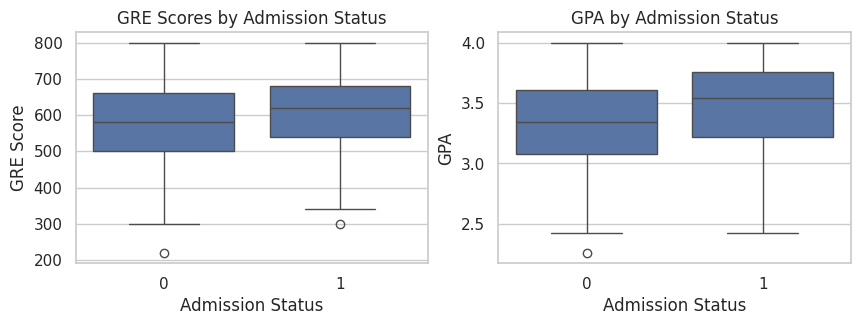

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# GRE Box Plot
sns.boxplot(ax=axes[0], x='admit', y='gre', data=data)
axes[0].set_title('GRE Scores by Admission Status')
axes[0].set_xlabel('Admission Status')
axes[0].set_ylabel('GRE Score')

# GPA Box Plot
sns.boxplot(ax=axes[1], x='admit', y='gpa', data=data)
axes[1].set_title('GPA by Admission Status')
axes[1].set_xlabel('Admission Status')
axes[1].set_ylabel('GPA')

plt.show()

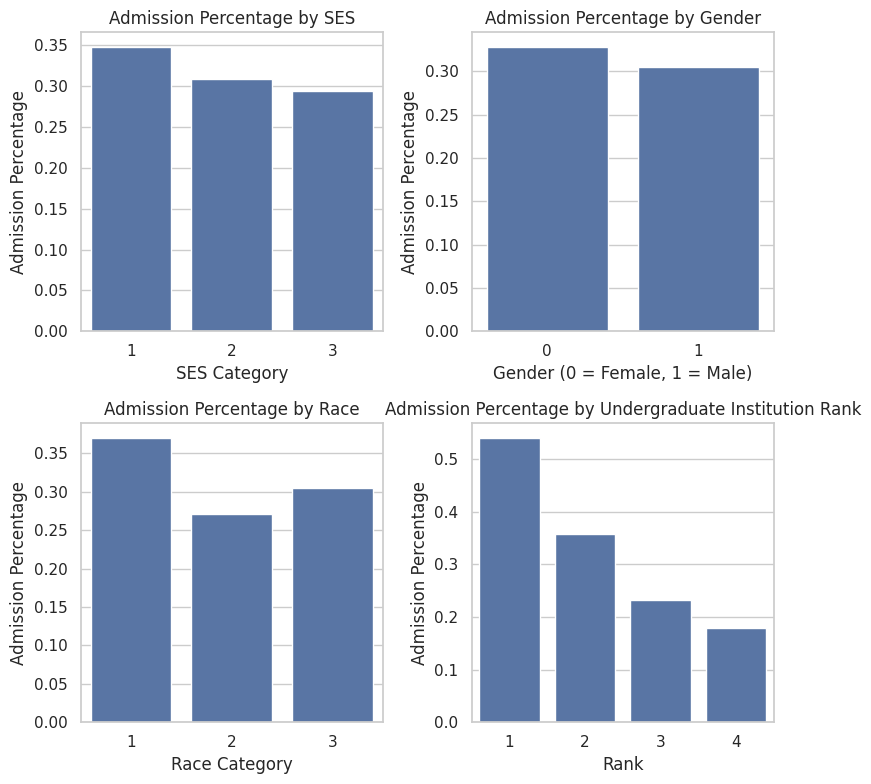

In [6]:
# We will also explore all the categorical data to see if they will have a direct impact on admit chance

admit_percentage_by_ses = data.groupby('ses')['admit'].mean()
admit_percentage_by_gender = data.groupby('Gender_Male')['admit'].mean()
admit_percentage_by_race = data.groupby('Race')['admit'].mean()
admit_percentage_by_rank = data.groupby('rank')['admit'].mean()

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

sns.barplot(ax=axes[0, 0], x=admit_percentage_by_ses.index, y=admit_percentage_by_ses.values)
axes[0, 0].set_title('Admission Percentage by SES')
axes[0, 0].set_xlabel('SES Category')
axes[0, 0].set_ylabel('Admission Percentage')

sns.barplot(ax=axes[0, 1], x=admit_percentage_by_gender.index, y=admit_percentage_by_gender.values)
axes[0, 1].set_title('Admission Percentage by Gender')
axes[0, 1].set_xlabel('Gender (0 = Female, 1 = Male)')
axes[0, 1].set_ylabel('Admission Percentage')

sns.barplot(ax=axes[1, 0], x=admit_percentage_by_race.index, y=admit_percentage_by_race.values)
axes[1, 0].set_title('Admission Percentage by Race')
axes[1, 0].set_xlabel('Race Category')
axes[1, 0].set_ylabel('Admission Percentage')

sns.barplot(ax=axes[1, 1], x=admit_percentage_by_rank.index, y=admit_percentage_by_rank.values)
axes[1, 1].set_title('Admission Percentage by Undergraduate Institution Rank')
axes[1, 1].set_xlabel('Rank')
axes[1, 1].set_ylabel('Admission Percentage')

plt.tight_layout()
plt.show()


After plotting the data, it looks like logistic regression would be a promising approach. We can start by encoding our categorical data into one hot encoding so that logistic regression can properly train on it.

In [7]:
# One-hot encoding categorical variables
encoded_data = pd.get_dummies(data, columns=['ses', 'Race', 'rank'], drop_first=True)

features = encoded_data.drop('admit', axis=1)
labels = encoded_data['admit']

X = features.to_numpy()
Y = labels.to_numpy().reshape(-1, 1)

num_features = X.shape[1]


We can now implement our logistic regression. Lets begin by defining some helper functions that we will use in the learning process

In [286]:
import math
import numpy as np

def sigmoid(x):
  return x
  return 1 / (1 + np.exp(-x))

class LogisticRegression:

  def __init__(self, optimizer = "simple_grad"):
    self.w = np.zeros((X.shape[1],))
    self.b = 0

    self.grad = getattr(self, optimizer)
    self.m_w = np.zeros((X.shape[1],))
    self.m_b = 0

    self.v_w = np.zeros((X.shape[1],))
    self.v_b = 0

    self.t = 1



  # helper functions for GD
  def predict(self, X):
    return sigmoid(np.dot(X, self.w) + self.b).reshape(-1, 1)

  def loss(self, A, Y):
    n = A.shape[0]
    return -1/n * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))

  #define some loss functions to monitor perf during training
  def t_loss(self):
    return self.loss(self.predict(self.X_train), self.Y_train)

  def v_loss(self):
    return self.loss(self.predict(self.X_val), self.Y_val)

  def get_test(self):
    return (self.predict(self.X_val), self.Y_val)

  def v_acc(self):
    A, Y = self.get_test()
    A = np.where(A >= .5, 1, 0)
    # Y = np.where(Y >= .5, 1, 0)
    acc = np.mean(A == Y)
    # print(acc)
    return acc


  # Vanilla gradient descent
  def simple_grad(self, X, Y):
    n = X.shape[0]

    A = self.predict(X)

    dw = np.dot(X.T, (A-Y)).reshape(-1)/n
    db= np.sum(A-Y)/n

    return (dw, db)

  #Gradient descent + momentum
  def momentum(self, X, Y, gamma=.9):
    dw, db = self.simple_grad(X, Y)

    self.v_w = gamma * self.v_w + dw
    self.v_b = gamma * self.v_b + db

    return (self.v_w, self.v_b)

  #Implementation of the adam optimizer
  def adam(self, X, Y, beta_1=.9, beta_2=.999, epsilon = 10e-8):
    dw, db = self.simple_grad(X, Y)

    self.m_w = beta_1 * self.m_w + (1 - beta_1) * dw
    self.m_b = beta_1 * self.m_b + (1 - beta_1) * db

    self.v_w = beta_2 * self.v_w + (1 - beta_2) * (dw **2)
    self.v_b = beta_2 * self.v_b + (1 - beta_2) * (db **2)

    mw =  self.m_w / (1 - (beta_1 ** self.t))
    mb =  self.m_b / (1 - (beta_1 ** self.t))

    vw =  self.v_w / (1 - (beta_2 ** self.t))
    vb =  self.v_b / (1 - (beta_2 ** self.t))


    self.t += 1

    dw = 1 / (np.sqrt(vw) + epsilon) * mw
    db = 1 / (math.sqrt(vb) + epsilon) * mb

    return (dw, db)


  def train_step(self, X, Y, lr):
    dw, db = self.grad(X, Y)

    self.w -= lr * dw
    self.b -= lr * db

  def fit(self, epochs, X, Y, num_batches=1, lr=1e-7, val_split=.2):

    #create train test split to evaluate performance on a validation set
    split = int(X.shape[0] * (1-val_split))

    self.X_train = X[:split]
    self.Y_train = Y[:split]

    self.X_val = X[split:]
    self.Y_val = Y[split:]


    #split into batches if specified
    batch_X_train = self.X_train.reshape(num_batches, -1, num_features)
    batch_Y_train = self.Y_train.reshape(num_batches, -1, 1)

    losses = []
    val_losses = []
    val_acc = []
    for i in range(epochs):
      for j in range(num_batches):
        self.train_step(batch_X_train[j], batch_Y_train[j], lr/num_batches)

      losses.append(self.t_loss())
      val_losses.append(self.v_loss())
      val_acc.append(self.v_acc())

    return losses, val_losses, val_acc




We can start with implementing batch GD

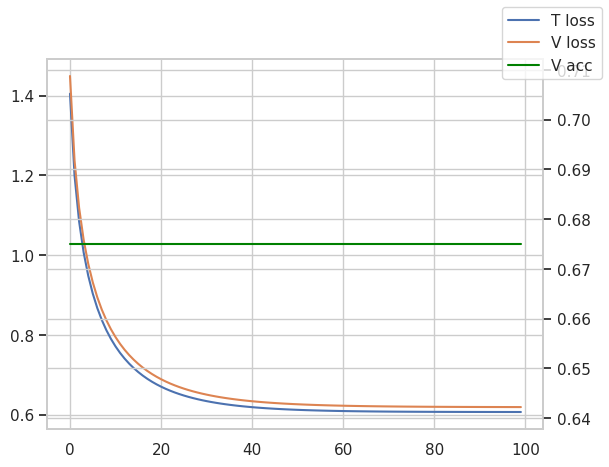

In [287]:
#Batch Gradient Descent
model = LogisticRegression()

losses, v_losses, v_accs = model.fit(100, X, Y)

fig, ax1 = plt.subplots()

ax1.plot(losses, label="T loss")
ax1.plot(v_losses, label="V loss")
# ax1.legend()

ax2 = ax1.twinx()
ax2.plot(v_accs, color="green", label="V acc")
# ax2.legend()
fig.legend()

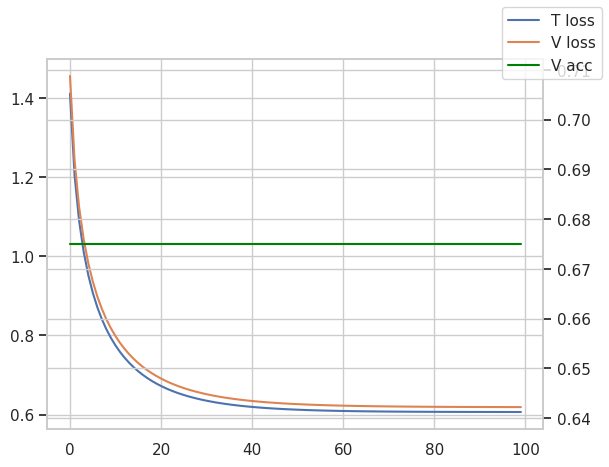

In [294]:
# Mini Batch Gradient Descent
model = LogisticRegression()

outs = model.fit(100, X, Y, num_batches=32)
losses, v_losses, v_accs = outs

fig, ax1 = plt.subplots()

ax1.plot(losses, label="T loss")
ax1.plot(v_losses, label="V loss")
# ax1.legend()

ax2 = ax1.twinx()
ax2.plot(v_accs, color="green", label="V acc")
# ax2.legend()
fig.legend()

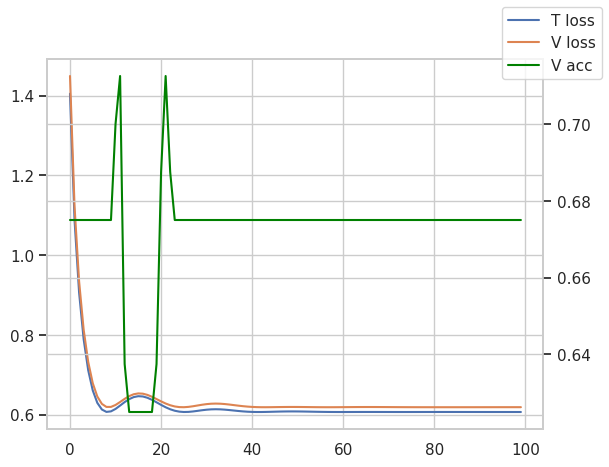

In [289]:
# For our first optimizer, we can optimize batch GD by adding momentum

momentum = LogisticRegression(optimizer="momentum")

outs = momentum.fit(100, X, Y)
losses, v_losses, v_accs = outs

fig, ax1 = plt.subplots()

ax1.plot(losses, label="T loss")
ax1.plot(v_losses, label="V loss")
# ax1.legend()

ax2 = ax1.twinx()
ax2.plot(v_accs, color="green", label="V acc")
# ax2.legend()
fig.legend()

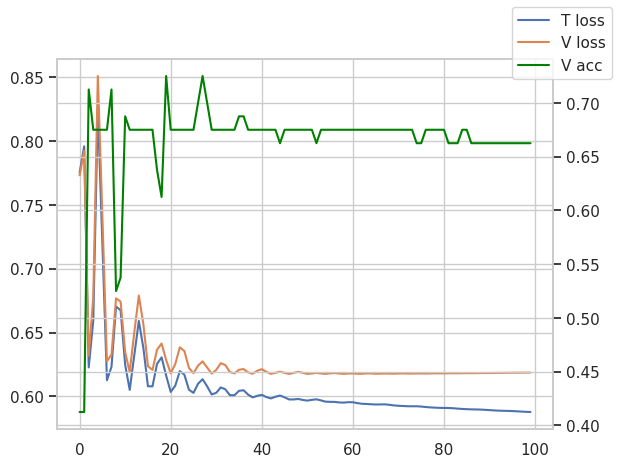

In [290]:
# Finally, we will implement the adam optimizer

adam = LogisticRegression("adam")

outs = adam.fit(100, X, Y, lr = .001)
losses, v_losses, v_accs = outs

fig, ax1 = plt.subplots()

ax1.plot(losses, label="T loss")
ax1.plot(v_losses, label="V loss")
# ax1.legend()

ax2 = ax1.twinx()
ax2.plot(v_accs, color="green", label="V acc")
# ax2.legend()
fig.legend()


Here we can see that the optimizers were probabaly unnecesarry for this task, but the most performant one was probably simply adding momentum (if for no more reason than in basically just resulted in a higher learning rate) I think that this is due to the simplicity of the model. The optimizers likely would have performed better if they were tuned or had their learning rate adjusted, but I wanted to keep that consistent between them as much as possible. However they all eventually reach essentially the same loss after 100 epochs, so I think we can safely say that they are all effective. They all get the same AUC score (more on this later)

Finally, lets see how well our model did! (Validation accurracy is hinting that it's not great)

In [291]:
model = LogisticRegression()

losses, v_losses, v_accs = model.fit(100, X, Y)
predicted_probs, true_labels = model.get_test()

np.max(predicted_probs)

0.4250508074212881

Uh oh, we never predict a single value over 50% chance. This means none of the metricts that we discussed in class will work. This sort of makes sense, because it is difficult to determine that anybody will have a >50% chance of getting into a given college, at least with the metrics we are provided. We can at least compute a ROC curve to see if we are doing better than guessing.

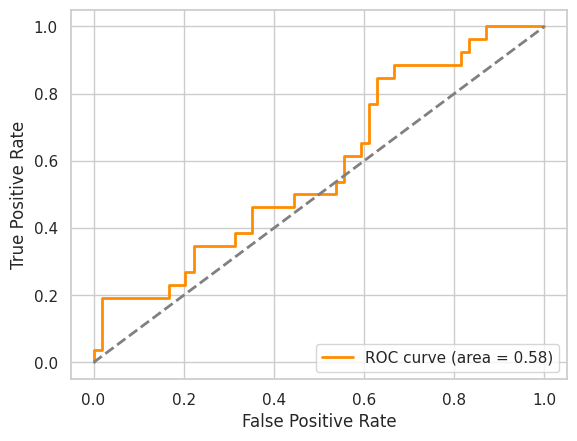

AUC Score: 0.58


In [299]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.2f}")

Here we can see we have an AUC score >.5, which means we are at least doing slightly better than guessing. Yay!